# Analyze speech features to classify PD

## Import Package 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error


from sklearn.neural_network import MLPClassifier



## Load and Anayze Data 

### Load Data

In [2]:
biomarker_data = "Data/"

In [3]:
train_data = pd.read_csv(biomarker_data +"pd_trainData.csv",low_memory=False)

test_data = pd.read_csv(biomarker_data +"pd_testData.csv",low_memory=False)

In [4]:
train_data.head()

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_data.head()

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6950001.0,1.0,3.0,0.0,0.0,0.0,61.0,0.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#check duplicate patient on train and test
train_data['lrrkid'].isin(test_data['lrrkid']).value_counts()

False    8342
Name: lrrkid, dtype: int64

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Columns: 4379 entries, lrrkid to CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed
dtypes: float64(4379)
memory usage: 117.6 MB


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8342 entries, 0 to 8341
Columns: 4379 entries, lrrkid to CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed
dtypes: float64(4379)
memory usage: 278.7 MB


In [9]:
train_data.head(10)

,lrrkid,gender,educcat_calc,pdenrl,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1420001.0,2.0,6.0,1.0,42.0,40.0,72.0,30.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,660003.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,660003.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
test_data['lrrkid'].nunique()

289

In [11]:
train_data['lrrkid'].nunique()

675

In [12]:
train_data["pdenrl"].value_counts()

1.0    4294
0.0    4048
Name: pdenrl, dtype: int64

In [13]:
test_data["pdenrl"].value_counts()

0.0    1921
1.0    1598
Name: pdenrl, dtype: int64

# Target variable y and independent variables x

In [14]:

trainX = train_data.drop(['lrrkid','pdenrl'], axis=1)

trainy = train_data['pdenrl']

trainy[0:5]

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: pdenrl, dtype: float64

In [15]:
trainX.head()

,gender,educcat_calc,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,moca_ageassess,updrs1,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,6.0,42.0,40.0,72.0,30.0,0.0,25.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
testX = test_data.drop(['lrrkid','pdenrl'], axis=1)

testY = test_data['pdenrl']

testY[0:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pdenrl, dtype: float64

In [17]:
testX.head()

,gender,educcat_calc,agediag,ageonset,demopd_ageassess,pd_duration,pdmedyn,MCATOT,moca_ageassess,updrs1,...,CNSOTHCM_lyme disease,CNSOTHCM_meningioma,CNSOTHCM_meningitis,CNSOTHCM_meningitis in childhood,CNSOTHCM_migraine,CNSOTHCM_multiple sclerosis,CNSOTHCM_nonREM parasonmnia (sleep walking),CNSOTHCM_optic neuritis,CNSOTHCM_possible Sleep apnea-hypopnea?,"CNSOTHCM_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,0.0,0.0,61.0,0.0,0.0,29.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print("Shape of Xtest: %d   %d" % (testX.shape))
print("Shape of yest:  %d" % (testY.shape))

print("Shape of trainx: %d   %d" % (trainX.shape))
print("Shape of trainY:  %d" % (trainy.shape))

Shape of Xtest: 3519   4377
Shape of yest:  3519
Shape of trainx: 8342   4377
Shape of trainY:  8342


In [19]:



from sklearn.preprocessing import StandardScaler
import time

sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

## Support Vector Machine

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

clf_svm = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))),
  ('classification', RandomForestClassifier(n_estimators=300))
])


#SVC(kernel='linear')
#(LinearSVC(penalty="l1", dual=False)




In [21]:
clf_svm.fit(trainX,trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=2.0, dual=False,
                                                     max_iter=5000,
                                                     penalty='l1'))),
                ('classification', RandomForestClassifier(n_estimators=300))])

In [22]:
fsvm_score = clf_svm.score(trainX, trainy)
print("Train Score: ", fsvm_score)

Train Score:  1.0


In [23]:
fcv_scores = cross_val_score(clf_svm, trainX, trainy, cv=10)
print("CV average score: %.2f" % fcv_scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

CV average score: 0.94


In [24]:
ypred = clf_svm.predict(testX)

cm = confusion_matrix(testY, ypred)
print(cm)

[[1824   97]
 [  69 1529]]


In [25]:
SVM_accuracy_score = accuracy_score(testY,clf_svm.predict(testX))*100
print("SVM test accuracy_score:", SVM_accuracy_score)

SVM test accuracy_score: 95.28275078147202


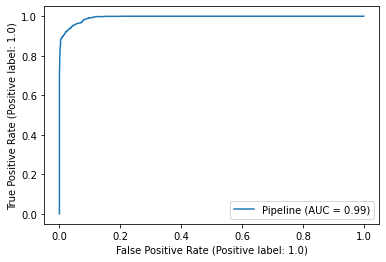

In [26]:
RocCurveDisplay.from_estimator(clf_svm,testX,testY)

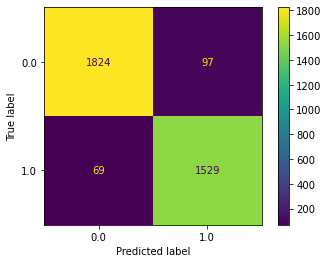

In [27]:

ConfusionMatrixDisplay.from_estimator(clf_svm, testX, testY)  
plt.show() 

In [28]:
print("confusion matrix\n",confusion_matrix(testY,ypred))
print("\nclassification report\n",classification_report(testY,ypred))
print("Accuracy: ",accuracy_score(testY,ypred)*100)

confusion matrix
 [[1824   97]
 [  69 1529]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1921
         1.0       0.94      0.96      0.95      1598

    accuracy                           0.95      3519
   macro avg       0.95      0.95      0.95      3519
weighted avg       0.95      0.95      0.95      3519

Accuracy:  95.28275078147202


## LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression

#lr_clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)

lr_clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))),
  ('classification', LogisticRegression(penalty='l1', solver='liblinear', random_state=0))
])

In [30]:
#start = time.time() 
# fitting x samples and y classes 
lr_clf.fit(trainX,trainy)
#stop = time.time()
#print(f"Training time: {stop - start}s") 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=2.0, dual=False,
                                                     max_iter=5000,
                                                     penalty='l1'))),
                ('classification',
                 LogisticRegression(penalty='l1', random_state=0,
                                    solver='liblinear'))])

In [31]:
lr_score = lr_clf.score(trainX, trainy)
print("Train Score: ", lr_score)

Train Score:  0.9677535363222249


In [32]:
lr_cv_scores = cross_val_score(lr_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % lr_cv_scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

CV average score: 0.94


In [33]:
lr_ypred = lr_clf.predict(testX)

cm = confusion_matrix(testY, lr_ypred)
print(cm)

[[1812  109]
 [  68 1530]]


In [34]:
lr_accuracy_score = accuracy_score(testY,lr_clf.predict(testX))*100
print("LR test accuracy_score:", lr_accuracy_score)

LR test accuracy_score: 94.97016197783461


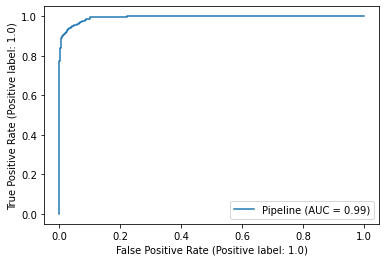

In [35]:
RocCurveDisplay.from_estimator(lr_clf,testX,testY)

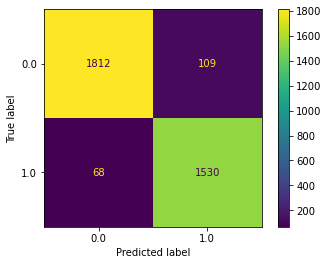

In [36]:
#confusion_matrix(y_test,yhat_svm)


ConfusionMatrixDisplay.from_estimator(lr_clf, testX, testY)  
plt.show() 

In [37]:
print("confusion matrix\n",confusion_matrix(testY,lr_ypred))
print("\nclassification report\n",classification_report(testY,lr_ypred))
print("Accuracy: ",accuracy_score(testY,lr_ypred)*100)

confusion matrix
 [[1812  109]
 [  68 1530]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1921
         1.0       0.93      0.96      0.95      1598

    accuracy                           0.95      3519
   macro avg       0.95      0.95      0.95      3519
weighted avg       0.95      0.95      0.95      3519

Accuracy:  94.97016197783461


In [38]:
from sklearn.linear_model import LogisticRegression


lrsv_clf = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=0))),
  ('classification', LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))
])


#LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False)
lr_clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))),
  ('classification', LogisticRegression(penalty='l1', solver='liblinear', random_state=0))
])

In [39]:
lrsv_clf.fit(trainX,trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                                              random_state=0,
                                                              solver='liblinear'))),
                ('classification',
                 LinearSVC(C=2.0, dual=False, max_iter=5000, penalty='l1'))])

In [40]:
lr_score = lrsv_clf.score(trainX, trainy)
print("Train Score: ", lr_score)

Train Score:  0.9688324142891392


In [41]:
lr_cv_scores = cross_val_score(lrsv_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % lr_cv_scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

CV average score: 0.94


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [42]:
lr_accuracy_score = accuracy_score(testY,lrsv_clf.predict(testX))*100
print("LR test accuracy_score:", lr_accuracy_score)

LR test accuracy_score: 94.54390451832907


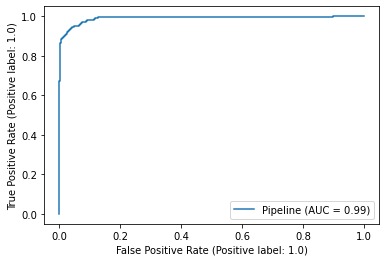

In [43]:
RocCurveDisplay.from_estimator(lrsv_clf,testX,testY)

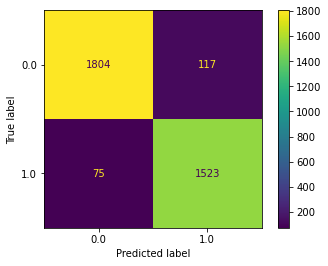

In [44]:

ConfusionMatrixDisplay.from_estimator(lrsv_clf, testX, testY)  
plt.show() 

In [45]:
print("confusion matrix\n",confusion_matrix(testY,lr_ypred))
print("\nclassification report\n",classification_report(testY,lr_ypred))
print("Accuracy: ",accuracy_score(testY,lr_ypred)*100)

confusion matrix
 [[1812  109]
 [  68 1530]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1921
         1.0       0.93      0.96      0.95      1598

    accuracy                           0.95      3519
   macro avg       0.95      0.95      0.95      3519
weighted avg       0.95      0.95      0.95      3519

Accuracy:  94.97016197783461


## KNeighborsClassifier (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

#Knn_clf = KNeighborsClassifier()


Knn_clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))),
  ('classification', KNeighborsClassifier(n_neighbors=10))
])


In [47]:
#start = time.time() 
# fitting x samples and y classes 
Knn_clf.fit(trainX,trainy)
#stop = time.time()
#print(f"Training time: {stop - start}s")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=2.0, dual=False,
                                                     max_iter=5000,
                                                     penalty='l1'))),
                ('classification', KNeighborsClassifier(n_neighbors=10))])

In [48]:
Knn_score = Knn_clf.score(trainX, trainy)
print("Train Score: ", Knn_score*100)

Train Score:  91.58475185806762


In [49]:
knn_cv_scores = cross_val_score(Knn_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % knn_cv_scores.mean())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

CV average score: 0.82


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [50]:
knn_ypred = Knn_clf.predict(testX)

cm = confusion_matrix(testY, knn_ypred)
print(cm)

[[1750  171]
 [ 229 1369]]


In [51]:
knn_accuracy_score = accuracy_score(testY,Knn_clf.predict(testX))*100
print("KNN test accuracy_score:", knn_accuracy_score)

KNN test accuracy_score: 88.63313441318556


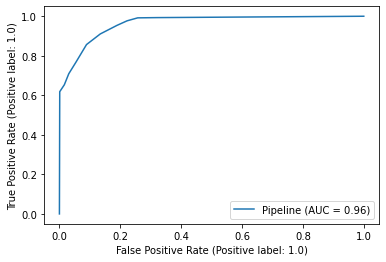

In [52]:
RocCurveDisplay.from_estimator(Knn_clf,testX,testY)

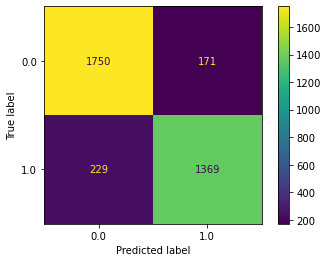

In [53]:

#confusion_matrix(y_test,yhat_svm)

ConfusionMatrixDisplay.from_estimator(Knn_clf, testX, testY)  
plt.show() 

In [54]:
print("confusion matrix\n",confusion_matrix(testY,knn_ypred))
print("\nclassification report\n",classification_report(testY,knn_ypred))
print("Accuracy: ",accuracy_score(testY,knn_ypred)*100)

confusion matrix
 [[1750  171]
 [ 229 1369]]

classification report
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      1921
         1.0       0.89      0.86      0.87      1598

    accuracy                           0.89      3519
   macro avg       0.89      0.88      0.88      3519
weighted avg       0.89      0.89      0.89      3519

Accuracy:  88.63313441318556


## Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation

In [55]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#dt_clf = tree.DecisionTreeClassifier()

dt_clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))),
  ('classification', DecisionTreeClassifier(criterion='entropy', random_state= 0))
])


#dt_clf = dt_clf.fit(trainX,trainy)

In [56]:
#start = time.time() 

dt_clf.fit(trainX,trainy)

#stop = time.time()
#print(f"Training time: {stop - start}s") 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=2.0, dual=False,
                                                     max_iter=5000,
                                                     penalty='l1'))),
                ('classification',
                 DecisionTreeClassifier(criterion='entropy', random_state=0))])

In [57]:
dt_score = dt_clf.score(trainX, trainy)
print("Train Score: ", dt_score)

Train Score:  1.0


In [58]:
dt_cv_scores = cross_val_score(dt_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % dt_cv_scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

CV average score: 0.94


In [59]:
dt_ypred = dt_clf.predict(testX)


dtcm = confusion_matrix(testY, dt_ypred)
print(dtcm)

[[1816  105]
 [  78 1520]]


In [60]:
dt_accuracy_score = accuracy_score(testY,dt_clf.predict(testX))*100
print("DT test accuracy_score:", dt_accuracy_score)

DT test accuracy_score: 94.7996589940324


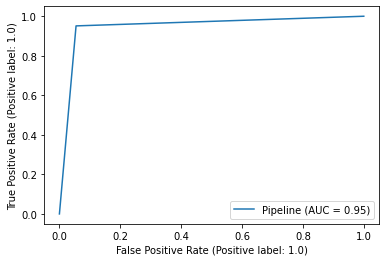

In [61]:
RocCurveDisplay.from_estimator(dt_clf,testX,testY)

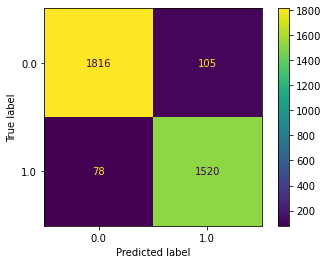

In [62]:

ConfusionMatrixDisplay.from_estimator(dt_clf, testX, testY)  
plt.show() 

In [63]:
print("confusion matrix\n",confusion_matrix(testY,dt_ypred))
print("\nclassification report\n",classification_report(testY,dt_ypred))
print("Accuracy: ",accuracy_score(testY,dt_ypred)*100)

confusion matrix
 [[1816  105]
 [  78 1520]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1921
         1.0       0.94      0.95      0.94      1598

    accuracy                           0.95      3519
   macro avg       0.95      0.95      0.95      3519
weighted avg       0.95      0.95      0.95      3519

Accuracy:  94.7996589940324


## RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

#rf_clf = RandomForestClassifier( random_state=0)


rf_clf = Pipeline([
  ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=300))),
  ('classification', LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))
])



In [65]:
#start = time.time() 

rf_clf.fit(trainX,trainy)

#stop = time.time()
#print(f"Training time: {stop - start}s") 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=300))),
                ('classification',
                 LinearSVC(C=2.0, dual=False, max_iter=5000, penalty='l1'))])

In [66]:
rf_score = rf_clf.score(trainX, trainy)
print("Train Score: ", rf_score)

Train Score:  0.9667945336849676


In [67]:
rf_cv_scores = cross_val_score(rf_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % rf_cv_scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

CV average score: 0.94


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [68]:
rf_ypred = rf_clf.predict(testX)

rfcm = confusion_matrix(testY, rf_ypred)
print(rfcm)

[[1811  110]
 [  82 1516]]


In [69]:
rf_accuracy_score = accuracy_score(testY,rf_clf.predict(testX))*100
print("DT test accuracy_score:", rf_accuracy_score)

DT test accuracy_score: 94.54390451832907


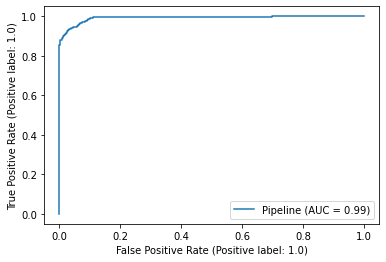

In [70]:
RocCurveDisplay.from_estimator(rf_clf,testX,testY)

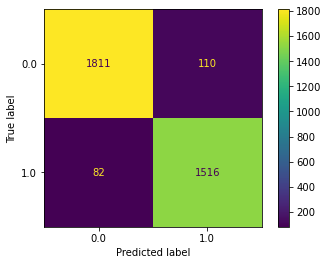

In [71]:
ConfusionMatrixDisplay.from_estimator(rf_clf, testX, testY)  
plt.show() 

In [72]:
print("confusion matrix\n",confusion_matrix(testY,rf_ypred))
print("\nclassification report\n",classification_report(testY,rf_ypred))
print("Accuracy: ",accuracy_score(testY,rf_ypred)*100)

confusion matrix
 [[1811  110]
 [  82 1516]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1921
         1.0       0.93      0.95      0.94      1598

    accuracy                           0.95      3519
   macro avg       0.94      0.95      0.95      3519
weighted avg       0.95      0.95      0.95      3519

Accuracy:  94.54390451832907


## AdaBoostClassifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier

#ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)


ada_clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))),
  ('classification', AdaBoostClassifier(n_estimators=100, random_state=0))
])

In [74]:
ada_clf.fit(trainX,trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=2.0, dual=False,
                                                     max_iter=5000,
                                                     penalty='l1'))),
                ('classification',
                 AdaBoostClassifier(n_estimators=100, random_state=0))])

In [75]:
ada_score = ada_clf.score(trainX, trainy)
print("Train Score: ", ada_score)

Train Score:  0.9751858067609686


In [76]:
ada_cv_scores = cross_val_score(ada_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % ada_cv_scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

CV average score: 0.92


In [77]:
ada_ypred = ada_clf.predict(testX)

adacm = confusion_matrix(testY, ada_ypred)
print(adacm)

[[1773  148]
 [  73 1525]]


In [78]:
ada_accuracy_score = accuracy_score(testY,ada_clf.predict(testX))*100
print("ADABoosting test accuracy_score:", ada_accuracy_score)

ADABoosting test accuracy_score: 93.71980676328504


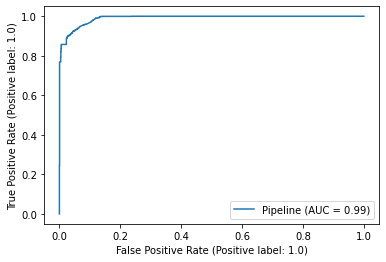

In [79]:
RocCurveDisplay.from_estimator(ada_clf,testX,testY)

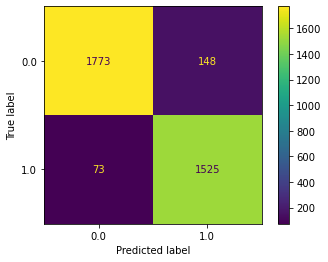

In [80]:
 
ConfusionMatrixDisplay.from_estimator(ada_clf, testX, testY)  
plt.show() 

In [81]:
print("confusion matrix\n",confusion_matrix(testY,ada_ypred))
print("\nclassification report\n",classification_report(testY,ada_ypred))
print("Accuracy: ",accuracy_score(testY,ada_ypred)*100)

confusion matrix
 [[1773  148]
 [  73 1525]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1921
         1.0       0.91      0.95      0.93      1598

    accuracy                           0.94      3519
   macro avg       0.94      0.94      0.94      3519
weighted avg       0.94      0.94      0.94      3519

Accuracy:  93.71980676328504


## GradientBoostingClassifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier 

#gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)


gb_clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))),
  ('classification',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0))
])

In [83]:
gb_clf.fit(trainX, trainy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=2.0, dual=False,
                                                     max_iter=5000,
                                                     penalty='l1'))),
                ('classification',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=1,
                                            random_state=0))])

In [84]:
gb_score = gb_clf.score(trainX, trainy)
print("Train Score: ", gb_score)

Train Score:  0.9757851834092544


In [85]:
gb_cv_scores = cross_val_score(gb_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % gb_cv_scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number 

CV average score: 0.94


In [86]:
gb_ypred = gb_clf.predict(testX)

gbcm = confusion_matrix(testY, gb_ypred)
print(gbcm)

[[1801  120]
 [  64 1534]]


In [87]:
gb_accuracy_score = accuracy_score(testY,gb_clf.predict(testX))*100
print("GBBoosting test accuracy_score:", gb_accuracy_score)

GBBoosting test accuracy_score: 94.77124183006535


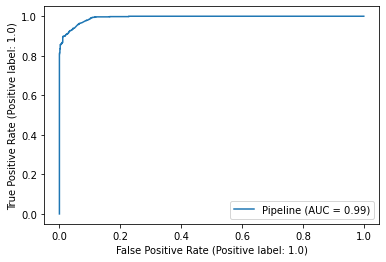

In [88]:
RocCurveDisplay.from_estimator(gb_clf,testX,testY)

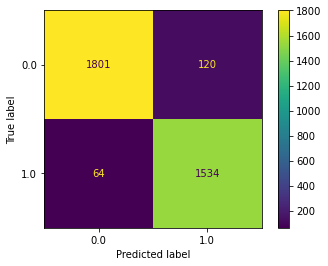

In [89]:
ConfusionMatrixDisplay.from_estimator(gb_clf, testX, testY)  
plt.show() 

In [90]:
print("confusion matrix\n",confusion_matrix(testY,gb_ypred))
print("\nclassification report\n",classification_report(testY,gb_ypred))
print("Accuracy: ",accuracy_score(testY,gb_ypred)*100)

confusion matrix
 [[1801  120]
 [  64 1534]]

classification report
               precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      1921
         1.0       0.93      0.96      0.94      1598

    accuracy                           0.95      3519
   macro avg       0.95      0.95      0.95      3519
weighted avg       0.95      0.95      0.95      3519

Accuracy:  94.77124183006535


# TRAINING AND TESTING THE NEURAL NETWORK

## Multi-layer Perceptron classifier (MLP classifier)

In [91]:

#tuple representing number of neurons in intermediate layers
nhiddentple=(256,128,64,32)

#   XX is the regularization parameter
XX = 1.e-4

# seed for random number generator
iseed = 1234

#the number of layers is set with hidden_layer_sizes
#create the multilayer perceptron object
#MLP_clf = MLPClassifier(hidden_layer_sizes=nhiddentple,activation='relu', solver='adam', early_stopping=True,
#random_state=iseed, batch_size=64, max_iter=2000, validation_fraction=0.1, tol=1.e-6, verbose=True)


MLP_clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=2.0, penalty="l1",max_iter=5000, dual=False))),
  ('classification', MLPClassifier(hidden_layer_sizes=nhiddentple,activation='relu', solver='adam', early_stopping=True, 
                                   random_state=iseed, batch_size=64, max_iter=2000, validation_fraction=0.1, tol=1.e-6, verbose=True))
])


In [92]:
# train the model
MLP_clf.fit(trainX, trainy) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.22373484
Validation score: 0.931737
Iteration 2, loss = 0.11046204
Validation score: 0.928144
Iteration 3, loss = 0.10734855
Validation score: 0.934132
Iteration 4, loss = 0.10099555
Validation score: 0.947305
Iteration 5, loss = 0.09351635
Validation score: 0.938922
Iteration 6, loss = 0.09168627
Validation score: 0.941317
Iteration 7, loss = 0.08583522
Validation score: 0.936527
Iteration 8, loss = 0.09358032
Validation score: 0.936527
Iteration 9, loss = 0.08738829
Validation score: 0.934132
Iteration 10, loss = 0.08801733
Validation score: 0.936527
Iteration 11, loss = 0.08385183
Validation score: 0.947305
Iteration 12, loss = 0.08381196
Validation score: 0.942515
Iteration 13, loss = 0.08286047
Validation score: 0.946108
Iteration 14, loss = 0.07892630
Validation score: 0.944910
Iteration 15, loss = 0.07558327
Validation score: 0.943713
Validation score did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=2.0, dual=False,
                                                     max_iter=5000,
                                                     penalty='l1'))),
                ('classification',
                 MLPClassifier(batch_size=64, early_stopping=True,
                               hidden_layer_sizes=(256, 128, 64, 32),
                               max_iter=2000, random_state=1234, tol=1e-06,
                               verbose=True))])

In [93]:
ypred = MLP_clf.predict(trainX)


In [94]:
accuracy_score(trainy, MLP_clf.predict(trainX))

0.9544473747302805

In [95]:
mlp_cv_scores = cross_val_score(MLP_clf, trainX, trainy, cv=10)
print("CV average score: %.2f" % mlp_cv_scores.mean())

Iteration 1, loss = 0.19123485
Validation score: 0.969374
Iteration 2, loss = 0.07617335
Validation score: 0.966711
Iteration 3, loss = 0.05915703
Validation score: 0.972037
Iteration 4, loss = 0.05398937
Validation score: 0.970706
Iteration 5, loss = 0.05298781
Validation score: 0.966711
Iteration 6, loss = 0.05090540
Validation score: 0.966711
Iteration 7, loss = 0.04844776
Validation score: 0.968043
Iteration 8, loss = 0.04865145
Validation score: 0.965379
Iteration 9, loss = 0.05010345
Validation score: 0.974700
Iteration 10, loss = 0.04531023
Validation score: 0.973369
Iteration 11, loss = 0.04833631
Validation score: 0.974700
Iteration 12, loss = 0.04429669
Validation score: 0.974700
Iteration 13, loss = 0.04370574
Validation score: 0.973369
Iteration 14, loss = 0.04125620
Validation score: 0.974700
Iteration 15, loss = 0.04348112
Validation score: 0.970706
Iteration 16, loss = 0.04182519
Validation score: 0.976032
Iteration 17, loss = 0.05128485
Validation score: 0.972037
Iterat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.18901837
Validation score: 0.932091
Iteration 2, loss = 0.08303294
Validation score: 0.953395
Iteration 3, loss = 0.06818729
Validation score: 0.961385
Iteration 4, loss = 0.06377008
Validation score: 0.948069
Iteration 5, loss = 0.05705792
Validation score: 0.960053
Iteration 6, loss = 0.05405778
Validation score: 0.966711
Iteration 7, loss = 0.05456945
Validation score: 0.950732
Iteration 8, loss = 0.04765080
Validation score: 0.962716
Iteration 9, loss = 0.04922860
Validation score: 0.953395
Iteration 10, loss = 0.04543698
Validation score: 0.957390
Iteration 11, loss = 0.04109856
Validation score: 0.962716
Iteration 12, loss = 0.04453077
Validation score: 0.960053
Iteration 13, loss = 0.04873757
Validation score: 0.956059
Iteration 14, loss = 0.04299107
Validation score: 0.956059
Iteration 15, loss = 0.04113467
Validation score: 0.965379
Iteration 16, loss = 0.03898215
Validation score: 0.957390
Iteration 17, loss = 0.04164480
Validation score: 0.949401
Valida

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.24056180
Validation score: 0.918775
Iteration 2, loss = 0.12654337
Validation score: 0.938748
Iteration 3, loss = 0.11042634
Validation score: 0.926764
Iteration 4, loss = 0.10805954
Validation score: 0.940080
Iteration 5, loss = 0.10166376
Validation score: 0.936085
Iteration 6, loss = 0.09819205
Validation score: 0.924101
Iteration 7, loss = 0.09488197
Validation score: 0.926764
Iteration 8, loss = 0.09928313
Validation score: 0.937417
Iteration 9, loss = 0.08946448
Validation score: 0.936085
Iteration 10, loss = 0.09038938
Validation score: 0.938748
Iteration 11, loss = 0.08719975
Validation score: 0.924101
Iteration 12, loss = 0.08919067
Validation score: 0.925433
Iteration 13, loss = 0.08367759
Validation score: 0.924101
Iteration 14, loss = 0.08381594
Validation score: 0.925433
Iteration 15, loss = 0.08067173
Validation score: 0.941411
Iteration 16, loss = 0.08231756
Validation score: 0.934754
Iteration 17, loss = 0.08238876
Validation score: 0.932091
Iterat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.25850171
Validation score: 0.909454
Iteration 2, loss = 0.13649961
Validation score: 0.909454
Iteration 3, loss = 0.11880541
Validation score: 0.928096
Iteration 4, loss = 0.11030505
Validation score: 0.928096
Iteration 5, loss = 0.10434881
Validation score: 0.926764
Iteration 6, loss = 0.10118814
Validation score: 0.918775
Iteration 7, loss = 0.09380581
Validation score: 0.932091
Iteration 8, loss = 0.09258911
Validation score: 0.936085
Iteration 9, loss = 0.09393686
Validation score: 0.921438
Iteration 10, loss = 0.08822658
Validation score: 0.929427
Iteration 11, loss = 0.08917942
Validation score: 0.933422
Iteration 12, loss = 0.08514718
Validation score: 0.936085
Iteration 13, loss = 0.08329433
Validation score: 0.933422
Iteration 14, loss = 0.08568123
Validation score: 0.930759
Iteration 15, loss = 0.08476506
Validation score: 0.929427
Iteration 16, loss = 0.08889231
Validation score: 0.929427
Iteration 17, loss = 0.08337955
Validation score: 0.941411
Iterat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.26426261
Validation score: 0.922770
Iteration 2, loss = 0.12856936
Validation score: 0.936085
Iteration 3, loss = 0.12019325
Validation score: 0.934754
Iteration 4, loss = 0.10913108
Validation score: 0.937417
Iteration 5, loss = 0.11167299
Validation score: 0.929427
Iteration 6, loss = 0.10587238
Validation score: 0.933422
Iteration 7, loss = 0.10125753
Validation score: 0.937417
Iteration 8, loss = 0.09914626
Validation score: 0.937417
Iteration 9, loss = 0.09766922
Validation score: 0.933422
Iteration 10, loss = 0.09375999
Validation score: 0.932091
Iteration 11, loss = 0.09132513
Validation score: 0.937417
Iteration 12, loss = 0.09428562
Validation score: 0.941411
Iteration 13, loss = 0.09098064
Validation score: 0.934754
Iteration 14, loss = 0.09265128
Validation score: 0.934754
Iteration 15, loss = 0.08998348
Validation score: 0.940080
Iteration 16, loss = 0.08592107
Validation score: 0.945406
Iteration 17, loss = 0.08464958
Validation score: 0.937417
Iterat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.24788730
Validation score: 0.934754
Iteration 2, loss = 0.13226320
Validation score: 0.937417
Iteration 3, loss = 0.12236840
Validation score: 0.928096
Iteration 4, loss = 0.11284030
Validation score: 0.946738
Iteration 5, loss = 0.10733592
Validation score: 0.936085
Iteration 6, loss = 0.10317918
Validation score: 0.937417
Iteration 7, loss = 0.09853227
Validation score: 0.949401
Iteration 8, loss = 0.10256395
Validation score: 0.938748
Iteration 9, loss = 0.09824127
Validation score: 0.948069
Iteration 10, loss = 0.10589197
Validation score: 0.948069
Iteration 11, loss = 0.09272344
Validation score: 0.946738
Iteration 12, loss = 0.08819126
Validation score: 0.941411
Iteration 13, loss = 0.08876247
Validation score: 0.941411
Iteration 14, loss = 0.09040022
Validation score: 0.945406
Iteration 15, loss = 0.08659202
Validation score: 0.949401
Iteration 16, loss = 0.08217887
Validation score: 0.956059
Iteration 17, loss = 0.08220535
Validation score: 0.944075
Iterat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.25055147
Validation score: 0.912117
Iteration 2, loss = 0.13133570
Validation score: 0.930759
Iteration 3, loss = 0.11593939
Validation score: 0.918775
Iteration 4, loss = 0.11070506
Validation score: 0.926764
Iteration 5, loss = 0.10565015
Validation score: 0.916112
Iteration 6, loss = 0.10081275
Validation score: 0.921438
Iteration 7, loss = 0.10059160
Validation score: 0.926764
Iteration 8, loss = 0.09760456
Validation score: 0.930759
Iteration 9, loss = 0.09683820
Validation score: 0.932091
Iteration 10, loss = 0.08920761
Validation score: 0.930759
Iteration 11, loss = 0.09168523
Validation score: 0.921438
Iteration 12, loss = 0.09257036
Validation score: 0.917443
Iteration 13, loss = 0.08698548
Validation score: 0.932091
Iteration 14, loss = 0.08652510
Validation score: 0.934754
Iteration 15, loss = 0.08428324
Validation score: 0.932091
Iteration 16, loss = 0.08416066
Validation score: 0.933422
Iteration 17, loss = 0.08050480
Validation score: 0.933422
Iterat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.24553063
Validation score: 0.917443
Iteration 2, loss = 0.13526945
Validation score: 0.916112
Iteration 3, loss = 0.12074424
Validation score: 0.922770
Iteration 4, loss = 0.10813058
Validation score: 0.933422
Iteration 5, loss = 0.10649498
Validation score: 0.921438
Iteration 6, loss = 0.10285610
Validation score: 0.938748
Iteration 7, loss = 0.10131195
Validation score: 0.936085
Iteration 8, loss = 0.10204796
Validation score: 0.937417
Iteration 9, loss = 0.09748662
Validation score: 0.938748
Iteration 10, loss = 0.09515149
Validation score: 0.944075
Iteration 11, loss = 0.09156165
Validation score: 0.937417
Iteration 12, loss = 0.09029065
Validation score: 0.925433
Iteration 13, loss = 0.08797588
Validation score: 0.926764
Iteration 14, loss = 0.08618766
Validation score: 0.930759
Iteration 15, loss = 0.08669022
Validation score: 0.946738
Iteration 16, loss = 0.08624306
Validation score: 0.936085
Iteration 17, loss = 0.08578297
Validation score: 0.933422
Iterat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.24884282
Validation score: 0.930759
Iteration 2, loss = 0.12607121
Validation score: 0.922770
Iteration 3, loss = 0.11581154
Validation score: 0.921438
Iteration 4, loss = 0.11359486
Validation score: 0.924101
Iteration 5, loss = 0.10647357
Validation score: 0.928096
Iteration 6, loss = 0.10407557
Validation score: 0.920107
Iteration 7, loss = 0.09961918
Validation score: 0.920107
Iteration 8, loss = 0.09499123
Validation score: 0.932091
Iteration 9, loss = 0.09364875
Validation score: 0.926764
Iteration 10, loss = 0.08930919
Validation score: 0.928096
Iteration 11, loss = 0.08986191
Validation score: 0.928096
Iteration 12, loss = 0.09189134
Validation score: 0.937417
Iteration 13, loss = 0.08937072
Validation score: 0.932091
Iteration 14, loss = 0.08692336
Validation score: 0.928096
Iteration 15, loss = 0.08617078
Validation score: 0.936085
Iteration 16, loss = 0.08594505
Validation score: 0.932091
Iteration 17, loss = 0.08486510
Validation score: 0.929427
Iterat

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration 1, loss = 0.27666418
Validation score: 0.929427
Iteration 2, loss = 0.13677819
Validation score: 0.937417
Iteration 3, loss = 0.11725426
Validation score: 0.922770
Iteration 4, loss = 0.11595292
Validation score: 0.934754
Iteration 5, loss = 0.11103097
Validation score: 0.930759
Iteration 6, loss = 0.10766535
Validation score: 0.937417
Iteration 7, loss = 0.10350118
Validation score: 0.942743
Iteration 8, loss = 0.09705448
Validation score: 0.942743
Iteration 9, loss = 0.09601203
Validation score: 0.932091
Iteration 10, loss = 0.09576695
Validation score: 0.936085
Iteration 11, loss = 0.09631850
Validation score: 0.934754
Iteration 12, loss = 0.10158910
Validation score: 0.944075
Iteration 13, loss = 0.09058171
Validation score: 0.938748
Iteration 14, loss = 0.08798443
Validation score: 0.953395
Iteration 15, loss = 0.08781155
Validation score: 0.944075
Iteration 16, loss = 0.08637892
Validation score: 0.938748
Iteration 17, loss = 0.08586504
Validation score: 0.941411
Iterat

In [96]:
MLP_clf.predict_proba(testX[:2])

array([[8.91226729e-01, 1.08773271e-01],
       [9.99898827e-01, 1.01172646e-04]])

In [97]:
yhat_mlp = MLP_clf.predict(testX)


In [98]:
mlp_test_accuracy_score = accuracy_score(testY,MLP_clf.predict(testX))*100
print("MLP test accuracy_score:", mlp_test_accuracy_score)

MLP test accuracy_score: 93.09462915601023


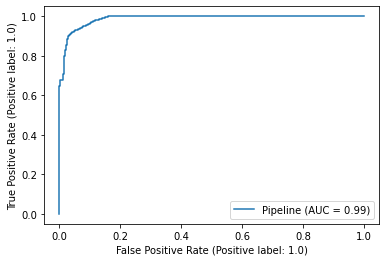

In [99]:
RocCurveDisplay.from_estimator(MLP_clf,testX,testY)

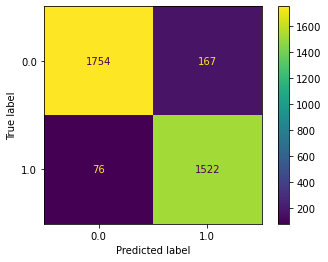

In [100]:
#confusion_matrix(y_test,yhat_svm)

ConfusionMatrixDisplay.from_estimator(MLP_clf, testX, testY)  
plt.show() 

In [101]:

print("confusion matrix\n",confusion_matrix(testY,yhat_mlp))
print("\nclassification report\n",classification_report(testY,yhat_mlp))
print("Accuracy: ",accuracy_score(testY,yhat_mlp)*100)

confusion matrix
 [[1754  167]
 [  76 1522]]

classification report
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.94      1921
         1.0       0.90      0.95      0.93      1598

    accuracy                           0.93      3519
   macro avg       0.93      0.93      0.93      3519
weighted avg       0.93      0.93      0.93      3519

Accuracy:  93.09462915601023
